<a href="https://colab.research.google.com/github/Bigbadwolf21/Nigeria-Food-Outlook/blob/main/Nigeria_Food_Outlook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mount the data into Google Colab
from google.colab import files
file_upload = files.upload()

Saving FAO_Nigeria_Food_Outlook.csv to FAO_Nigeria_Food_Outlook (1).csv


In [3]:
# Load the data
data = pd.read_csv("FAO_Nigeria_Food_Outlook.csv")

In [4]:
# Head view of the data
data.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,566,Nigeria,5111,Stocks,02132,Asses,1961,1961,An,1398000.0,E,Estimated value,NaN
1,QCL,Crops and livestock products,566,Nigeria,5111,Stocks,02132,Asses,1962,1962,An,1364000.0,E,Estimated value,NaN
2,QCL,Crops and livestock products,566,Nigeria,5111,Stocks,02132,Asses,1963,1963,An,1330000.0,E,Estimated value,NaN
3,QCL,Crops and livestock products,566,Nigeria,5111,Stocks,02132,Asses,1964,1964,An,1296000.0,A,Official figure,NaN
4,QCL,Crops and livestock products,566,Nigeria,5111,Stocks,02132,Asses,1965,1965,An,1240000.0,A,Official figure,NaN


In [5]:
# General information on the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13570 entries, 0 to 13569
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       13570 non-null  object 
 1   Domain            13570 non-null  object 
 2   Area Code (M49)   13570 non-null  int64  
 3   Area              13570 non-null  object 
 4   Element Code      13570 non-null  int64  
 5   Element           13570 non-null  object 
 6   Item Code (CPC)   13570 non-null  object 
 7   Item              13570 non-null  object 
 8   Year Code         13570 non-null  int64  
 9   Year              13570 non-null  int64  
 10  Unit              13570 non-null  object 
 11  Value             13315 non-null  float64
 12  Flag              13570 non-null  object 
 13  Flag Description  13570 non-null  object 
 14  Note              412 non-null    object 
dtypes: float64(1), int64(4), object(10)
memory usage: 1.6+ MB


In [6]:
# Statistical Information
data.describe()

,Area Code (M49),Element Code,Year Code,Year,Value
count,13570.0,13570.000000,13570.000000,13570.000000,1.331500e+04
mean,566.0,5407.092041,1992.358659,1992.358659,1.518769e+06
std,0.0,104.591054,18.167386,18.167386,5.386245e+06
min,566.0,5111.000000,1961.000000,1961.000000,0.000000e+00
25%,566.0,5312.000000,1977.000000,1977.000000,4.293800e+03
50%,566.0,5412.000000,1993.000000,1993.000000,6.600000e+04
75%,566.0,5510.000000,2008.000000,2008.000000,6.365000e+05
max,566.0,5513.000000,2023.000000,2023.000000,8.929428e+07


In [7]:
# A little bit of cleaning and preparation
data = data.copy()
data["Year"] = pd.to_numeric(data["Year"], errors="coerce")
data["Value"] = pd.to_numeric(data["Value"], errors="coerce")

In [8]:
# Ensuring that the area is Nigeria
data = data[data["Area"] == "Nigeria"]

In [9]:
# Head view
data.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,566,Nigeria,5111,Stocks,02132,Asses,1961,1961,An,1398000.0,E,Estimated value,NaN
1,QCL,Crops and livestock products,566,Nigeria,5111,Stocks,02132,Asses,1962,1962,An,1364000.0,E,Estimated value,NaN
2,QCL,Crops and livestock products,566,Nigeria,5111,Stocks,02132,Asses,1963,1963,An,1330000.0,E,Estimated value,NaN
3,QCL,Crops and livestock products,566,Nigeria,5111,Stocks,02132,Asses,1964,1964,An,1296000.0,A,Official figure,NaN
4,QCL,Crops and livestock products,566,Nigeria,5111,Stocks,02132,Asses,1965,1965,An,1240000.0,A,Official figure,NaN


## Unveiling Nigeria's Agricultural Landscape: A Data-Driven Narrative

This report presents a comprehensive overview of Nigeria's food outlook, drawing insights from the provided FAO dataset. By analyzing production trends, key commodities, and yield data, we aim to paint a clear picture of the nation's agricultural strengths and areas for potential growth.

### The Pillars of Nigerian Agriculture: Top Commodities in 2023

Examining the agricultural output in 2023 reveals the bedrock of Nigeria's food production. The data clearly shows the prominence of certain staple crops, essential for feeding the nation.

In [10]:
# Get element of different year
def get_element_item_year(element, items, year=None, year_range=None):
    sel = data[data["Element"] == element]
    if isinstance(items, list):
        sel = sel[sel["Item"].isin(items)]
    else:
        sel = sel[sel["Item"] == items]
    if year is not None:
        sel = sel[sel["Year"] == year]
    if year_range is not None:
        sel = sel[(sel["Year"] >= year_range[0]) & (sel["Year"] <= year_range[1])]
    return sel

In [11]:
# Top 10 Crops produced in the most recent year 2023
prod_2023 = get_element_item_year("Production", data["Item"].unique().tolist(), year=2023)

In [12]:
top_ten_2023 = (
    prod_2023.groupby("Item", as_index=False)["Value"]
    .sum()
    .sort_values("Value", ascending=False)
    .head(10)
)

print("Top 10 produced items in Nigeria (2023):")
print(top_ten_2023)

Top 10 produced items in Nigeria (2023):
                              Item        Value
3                   Cassava, fresh  62690091.19
69                            Yams  61921741.44
23        Hen eggs in shell, fresh  17402847.28
37                  Oil palm fruit  11597872.39
27                    Maize (corn)  11053000.00
57                            Rice   8902200.00
65                            Taro   8334557.19
0                          Bananas   7308103.18
48  Other vegetables, fresh n.e.c.   7057237.90
61                         Sorghum   6402000.00


As visualized below, Cassava and Yams stand out with significantly higher production volumes compared to other crops, underscoring their critical role in Nigeria's food security.

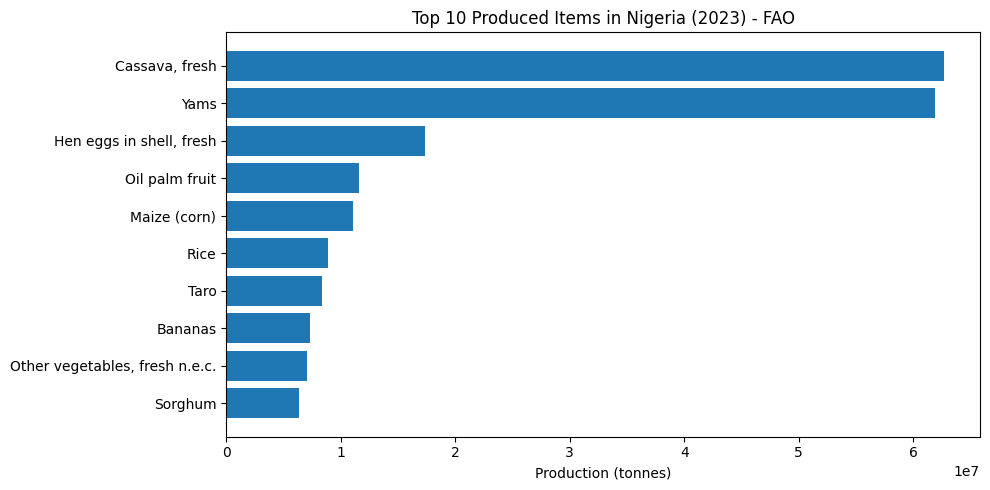

In [13]:
# Putting it in a Bar chart
plt.figure(figsize=(10, 5))
plt.barh(top_ten_2023["Item"][::-1], top_ten_2023["Value"][::-1])
plt.xlabel("Production (tonnes)")
plt.title("Top 10 Produced Items in Nigeria (2023) - FAO")
plt.tight_layout()
plt.show()

#### Tracing the Trajectory: Long-Term Production Trends (1961-2023)
Understanding the historical production trends provides context for the current agricultural landscape. We analyzed the production of key crops: Cassava, Maize, Rice, Wheat, and Yams over a span of more than six decades.


In [14]:
# Long-term trends for Cassava, Maize, Rice, Wheat
items_trend = ["Cassava, fresh", "Maize (corn)", "Rice", "Wheat", "Yams"]
trend_df = get_element_item_year("Production", items_trend, year_range=(1961, 2023))

trend_pivot = (
    trend_df.pivot_table(index="Year", columns="Item", values="Value", aggfunc="sum")
    .fillna(0)
)

print("\nSample of Production trends (last 10 years):")
print(trend_pivot.tail(10))


Sample of Production trends (last 10 years):
Item  Cassava, fresh  Maize (corn)       Rice     Wheat         Yams
Year                                                                
2014     54324700.00    10790600.0  6690000.0  91300.00  43709800.00
2015     57405060.00     9540190.0  7573400.0  60000.00  44103900.00
2016     60529864.00    10532340.0  7812200.0  60000.00  48982621.00
2017     61350199.00    10632299.0  7835100.0  82758.00  49519100.00
2018     65350850.00    10934149.0  8403300.0  88362.00  55363999.00
2019     56969160.00    12598945.0  8435510.0  86900.00  52914910.00
2020     55565610.00    12403300.0  8171800.0  55000.00  56345530.00
2021     58237500.00    12744450.0  8342000.0  36944.00  59884050.00
2022     61015339.21    12948920.0  8502000.0  34427.11  61381808.65
2023     62690091.19    11053000.0  8902200.0  52757.03  61921741.44


The trends, as depicted in the following plot, highlight a remarkable increase in the production of Cassava and Yams, demonstrating consistent growth over the years. Maize and Rice production have also seen growth, albeit at a more gradual pace, while Wheat production has remained relatively low.


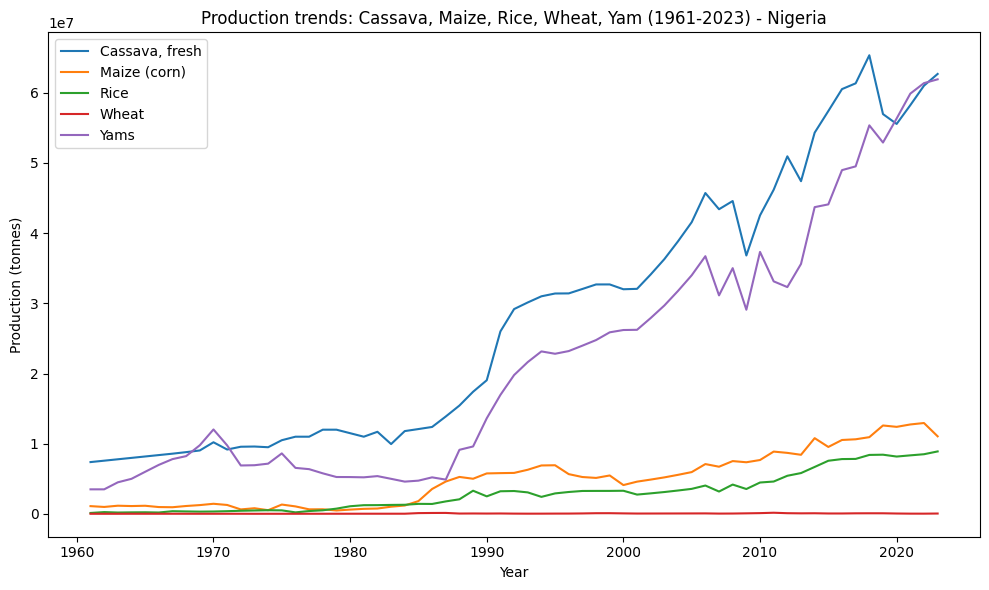

In [15]:
# Plot trends
plt.figure(figsize=(10, 6))
for item in trend_pivot.columns:
    plt.plot(trend_pivot.index, trend_pivot[item], label=item)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Production (tonnes)")
plt.title("Production trends: Cassava, Maize, Rice, Wheat, Yam (1961-2023) - Nigeria")
plt.tight_layout()
plt.show()

In [16]:
# Crop Yield Gap Analysis
yield_items = ["Cassava, fresh", "Maize (corn)", "Rice", "Wheat", "Yams"]
yield_df = data[
    (data["Element"] == "Yield") & (data["Item"].isin(yield_items)) & (data["Year"] >= 1990)
]
yield_pivot = yield_df.pivot_table(
    index="Year", columns="Item", values="Value", aggfunc="mean"
)

print("\nSample Yield Data (kg/ha):")
print(yield_pivot.tail(10))


Sample Yield Data (kg/ha):
Item  Cassava, fresh  Maize (corn)    Rice   Wheat     Yams
Year                                                       
2014          7655.4        1700.2  2160.9  1304.3   8194.8
2015          7265.9        1718.8  2074.2  1000.0   8182.7
2016          9076.3        1783.7  2003.7  1000.0   9159.9
2017          9073.7        1664.1  2081.0  1677.9   9385.6
2018          9403.8        1671.6  2067.0  1714.2  10199.9
2019          5827.1        1857.2  2044.1  1682.6   7806.8
2020          5779.5        2050.6  1947.9  1100.0   7904.7
2021          5835.8        2053.8  1931.0  3125.5   7986.5
2022          6014.5        2232.6  1856.3  2189.1   8182.9
2023          6345.9        1939.1  1974.0  1586.8   8203.4


#### Maximizing the Land: A Look at Crop Yields (1990-2023)
Yield data offers insights into the productivity of Nigeria's agricultural land. We examined the yield per hectare for the selected key crops from 1990 onwards.



In [17]:
# Average Yield from 1990 to 2023
avg_yields = pd.DataFrame(
    {
        "Item": yield_pivot.columns,
        "AvgYield_1990_2023": yield_pivot.mean().values,
    }
).sort_values("AvgYield_1990_2023", ascending=False)

print("\nAverage yields (1990–2023):")
print(avg_yields)


Average yields (1990–2023):
             Item  AvgYield_1990_2023
4            Yams         9815.250000
0  Cassava, fresh         9595.529412
2            Rice         1770.214706
1    Maize (corn)         1598.438235
3           Wheat         1552.752941


Analyzing the average yields from 1990 to 2023, we see variations in land productivity across different crops.

The individual yield plots below showcase the year-on-year fluctuations and overall trends for each crop's yield, providing a more granular view of land productivity over time.

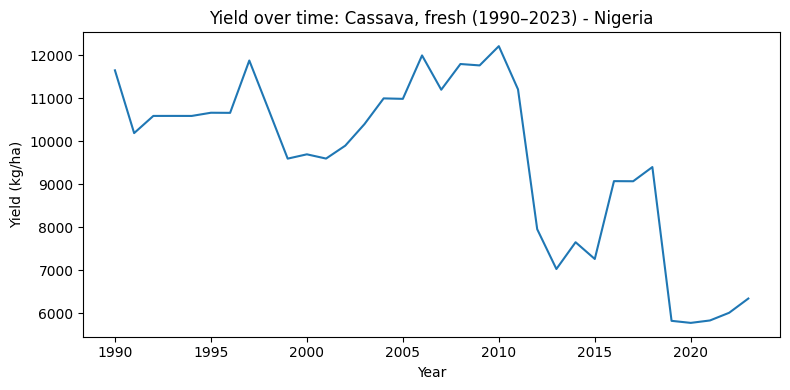

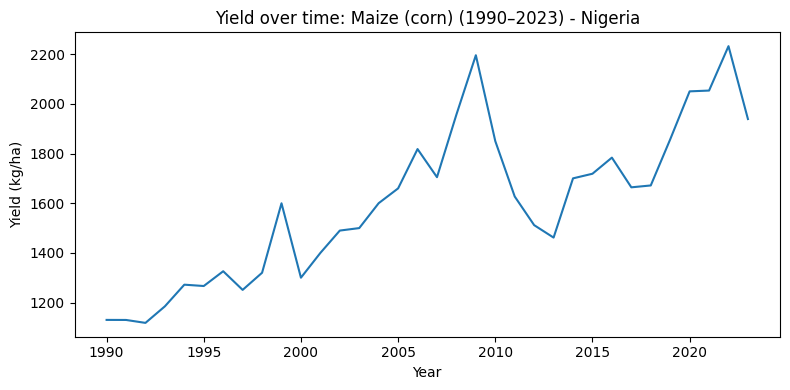

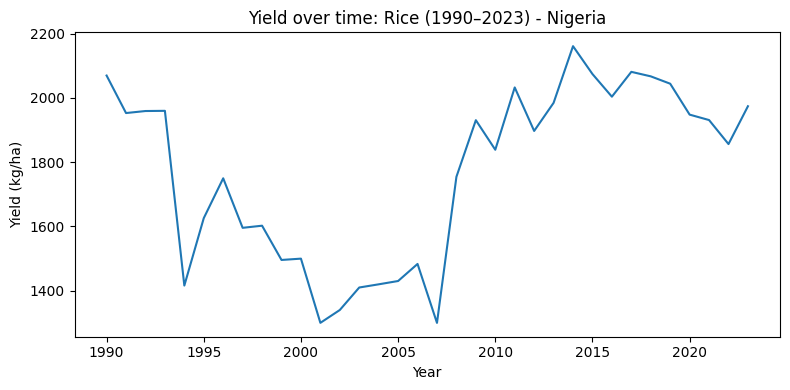

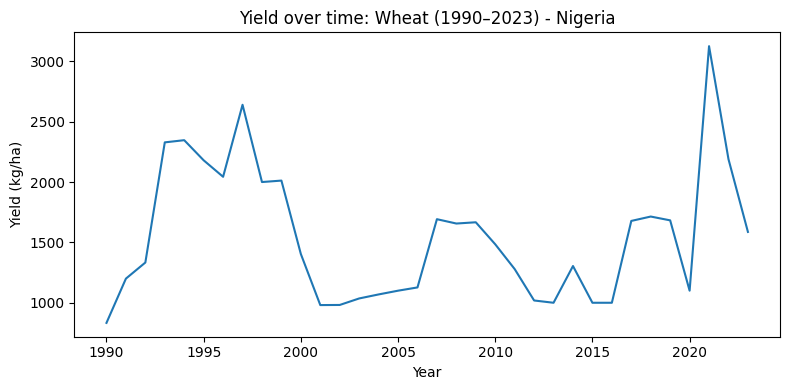

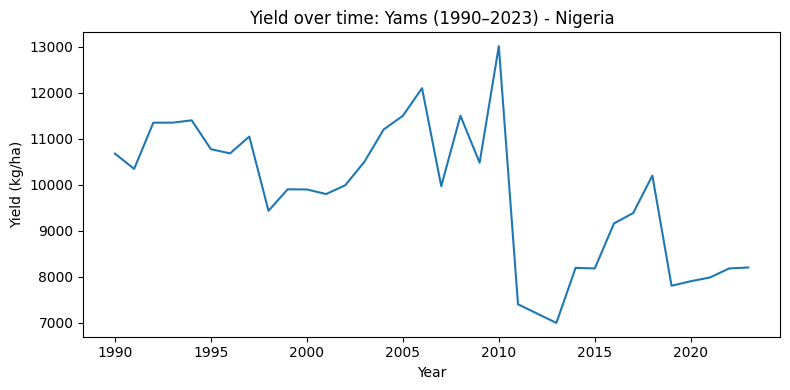

In [18]:
# Yield for each Crop
for item in yield_pivot.columns:
    plt.figure(figsize=(8, 4))
    plt.plot(yield_pivot.index, yield_pivot[item])
    plt.xlabel("Year")
    plt.ylabel("Yield (kg/ha)")
    plt.title(f"Yield over time: {item} (1990–2023) - Nigeria")
    plt.tight_layout()
    plt.show()

#### A Striking Contrast: Cassava vs Wheat Production in 2023
A direct comparison of the production volumes of Cassava and Wheat in 2023 dramatically illustrates the difference in their scale within Nigeria's agricultural output.


In [19]:
# Cassava vs Wheat Production in 2023
cassava_2023 = (
    get_element_item_year("Production", "Cassava, fresh", year=2023)
    .groupby("Item", as_index=False)["Value"]
    .sum()
)
wheat_2023 = (
    get_element_item_year("Production", "Wheat", year=2023)
    .groupby("Item", as_index=False)["Value"]
    .sum()
)

snapshot = pd.concat([cassava_2023, wheat_2023], ignore_index=True)
snapshot["Commodity"] = snapshot["Item"]

print("\nCassava vs Wheat production (2023):")
print(snapshot)


Cassava vs Wheat production (2023):
             Item        Value       Commodity
0  Cassava, fresh  62690091.19  Cassava, fresh
1           Wheat     52757.03           Wheat


This visual comparison below clearly demonstrates the overwhelming production volume of Cassava compared to Wheat in 2023.

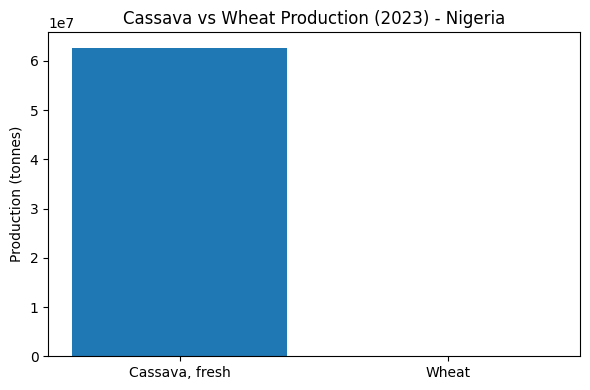

In [20]:
# Let's visualize it
plt.figure(figsize=(6, 4))
plt.bar(snapshot["Commodity"], snapshot["Value"])
plt.ylabel("Production (tonnes)")
plt.title("Cassava vs Wheat Production (2023) - Nigeria")
plt.tight_layout()
plt.show()

#### Conclusion: Navigating Nigeria's Food Future
In conclusion, the analysis of the FAO data provides a compelling narrative of Nigeria's agricultural sector. The dominance and significant growth of Cassava and Yams highlight their importance. While yield data shows variations and opportunities for improvement, the overall trends point to a dynamic agricultural landscape. Understanding these patterns is crucial for developing effective strategies to enhance food security, promote sustainable practices, and support the livelihoods of farmers across Nigeria.
